In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel(r'C:\Users\jessputhussery\Downloads\iris.xls')
data               

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [5]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
L_E=LabelEncoder()
data['Classification']=L_E.fit_transform(data['Classification'])

In [8]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [9]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [36]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [53]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

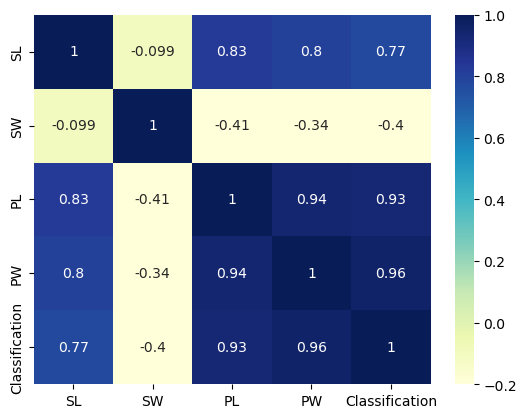

In [11]:
sns.heatmap(data.corr(),annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')
plt.figsize(10,8)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

D:\jeslin\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))


Accuracy is 1.0


In [49]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [ ]:
## k-NN Classification

In [64]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [65]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

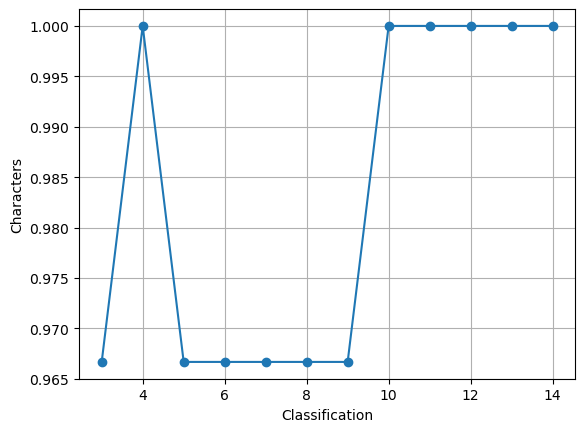

In [66]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Classification')
plt.ylabel('Characters')
plt.grid()

In [67]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))


Accuracy is 0.9666666666666667


In [68]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [57]:
#SVM Classification

In [69]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [70]:
y_pred=svmclf.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [72]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [61]:
##Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [74]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [75]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [76]:
##RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [78]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [79]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [80]:
##Hyperparametertuning

In [81]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(x_train,y_train)
y_pred=rf_clf1.predict(x_test)

In [82]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [83]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)